In [117]:
from src.data import semi_empirical_mass_formula, get_nuclear_data
from matplotlib import pyplot as plt
import numpy as np
import os

In [8]:
data = get_nuclear_data(get_ame=False)
semf = semi_empirical_mass_formula(data.z, data.n)

/tmp/ipykernel_2800186/2851589425.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


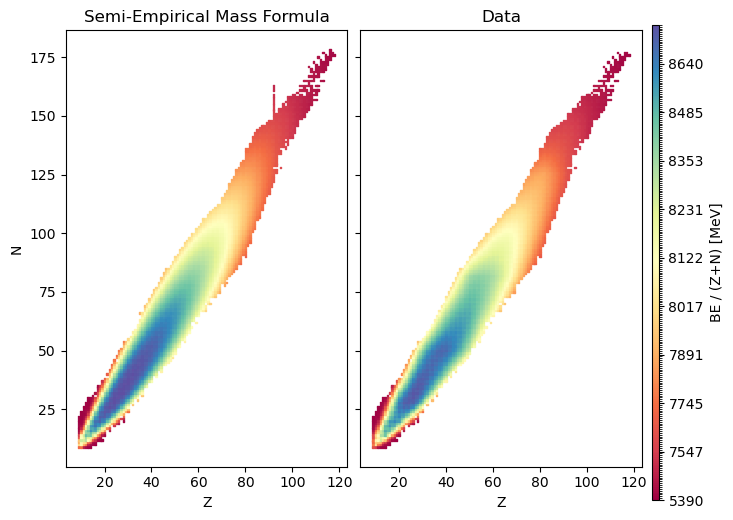

In [124]:
# Plotting the semi-empirical mass formula
import matplotlib.colors as colors

cmap = plt.get_cmap('Spectral')
vals = np.concatenate([semf.values, data.binding.values])
vals = vals[~np.isnan(vals)]
# Define boundaries based on quantiles
boundaries = np.quantile(vals, np.linspace(0, 1, cmap.N))

# Use these boundaries for the normalization
norm = colors.BoundaryNorm(boundaries, cmap.N)
# norm = plt.Normalize(vmin=np.min(vals), vmax=np.max(vals))

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes = axes.flatten()
ax = axes[0]


sc = ax.scatter(x=data.z, y=data.n, c=semf, cmap=cmap, rasterized=True, s=1, marker='s', norm=norm)
ax.set_title('Semi-Empirical Mass Formula'); ax.set_ylabel('N'); ax.set_xlabel('Z')
ax.set_aspect('equal')

ax = axes[1]
sc = ax.scatter(x=data.z, y=data.n, c=data.binding, cmap=cmap, rasterized=True, s=1, marker='s', norm=norm)
ax.set_title('Data'); ax.set_xlabel('Z')
ax.set_aspect('equal')
# set size of last axis
cbar_ax = fig.add_axes([1.01, 0., 0.01, 0.99])
cbar = fig.colorbar(sc, label='BE / (Z+N) [MeV]', cax=cbar_ax, shrink=1, pad=0.05)


fig.tight_layout(pad=0)
if not os.path.exists('../plots/paper/figures'):
    os.makedirs('../plots/paper/figures')
plt.savefig('../plots/paper/figures/semf.pdf', bbox_inches='tight', pad_inches=0.01, dpi=300)
plt.show()